In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams["figure.autolayout"] = True

In [2]:
img = cv2.imread('photo3.PNG')

(-0.5, 345.5, 502.5, -0.5)

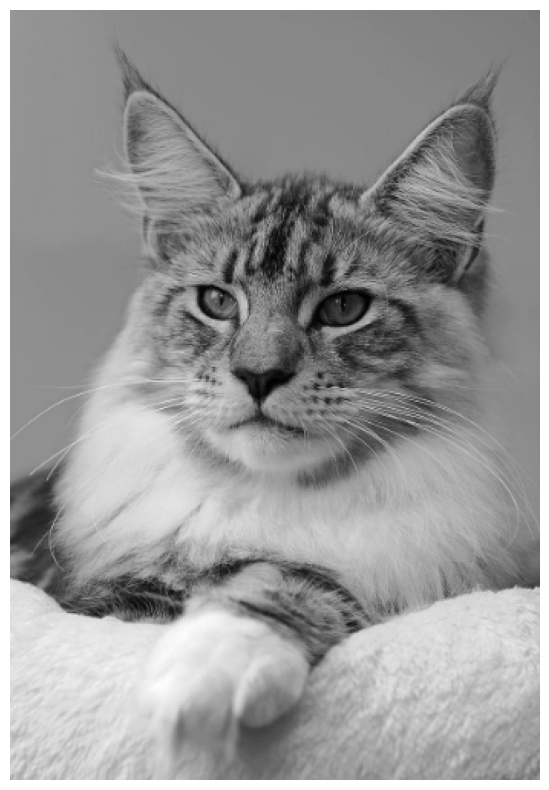

In [3]:
plt.figure(figsize = (12,8))
plt.imshow(img)
plt.axis('off')

In [4]:
def contrastStretching(r, r1, s1, r2, s2):
    if r < r1:
        s = (s1 / r1) * r
    elif r > r1 and r < r2:
        s = ((s2 - s1) / (r2 - r1)) * (r - r1) + s1 
    else: 
        s = ((255 -s2) / (255 - r2)) * (r - r2) + s2
        
    return int(s)

In [5]:
contrastStretchingVector = np.vectorize(contrastStretching)

In [6]:
x_values = np.linspace(0,255,500)
y_values = contrastStretchingVector(x_values, 80, 30, 150, 190)

In [7]:
transformed_img = contrastStretchingVector(img, 80, 30, 150, 190)

In [8]:
def plot_results(input_img, output_img, x_values, y_values, save_as):

    # plotting the graph
    plt.figure(figsize = (36,12))

    plt.subplot(131)
    plt.imshow(input_img)
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(132)
    plt.plot(x_values, y_values)
    plt.xlabel('Input Pixels')
    plt.ylabel('Output Pixels')
    plt.grid(True)

    plt.subplot(133)
    plt.imshow(output_img)
    plt.title('Transformed Image')
    plt.axis('off')

    plt.savefig(save_as + '.png')

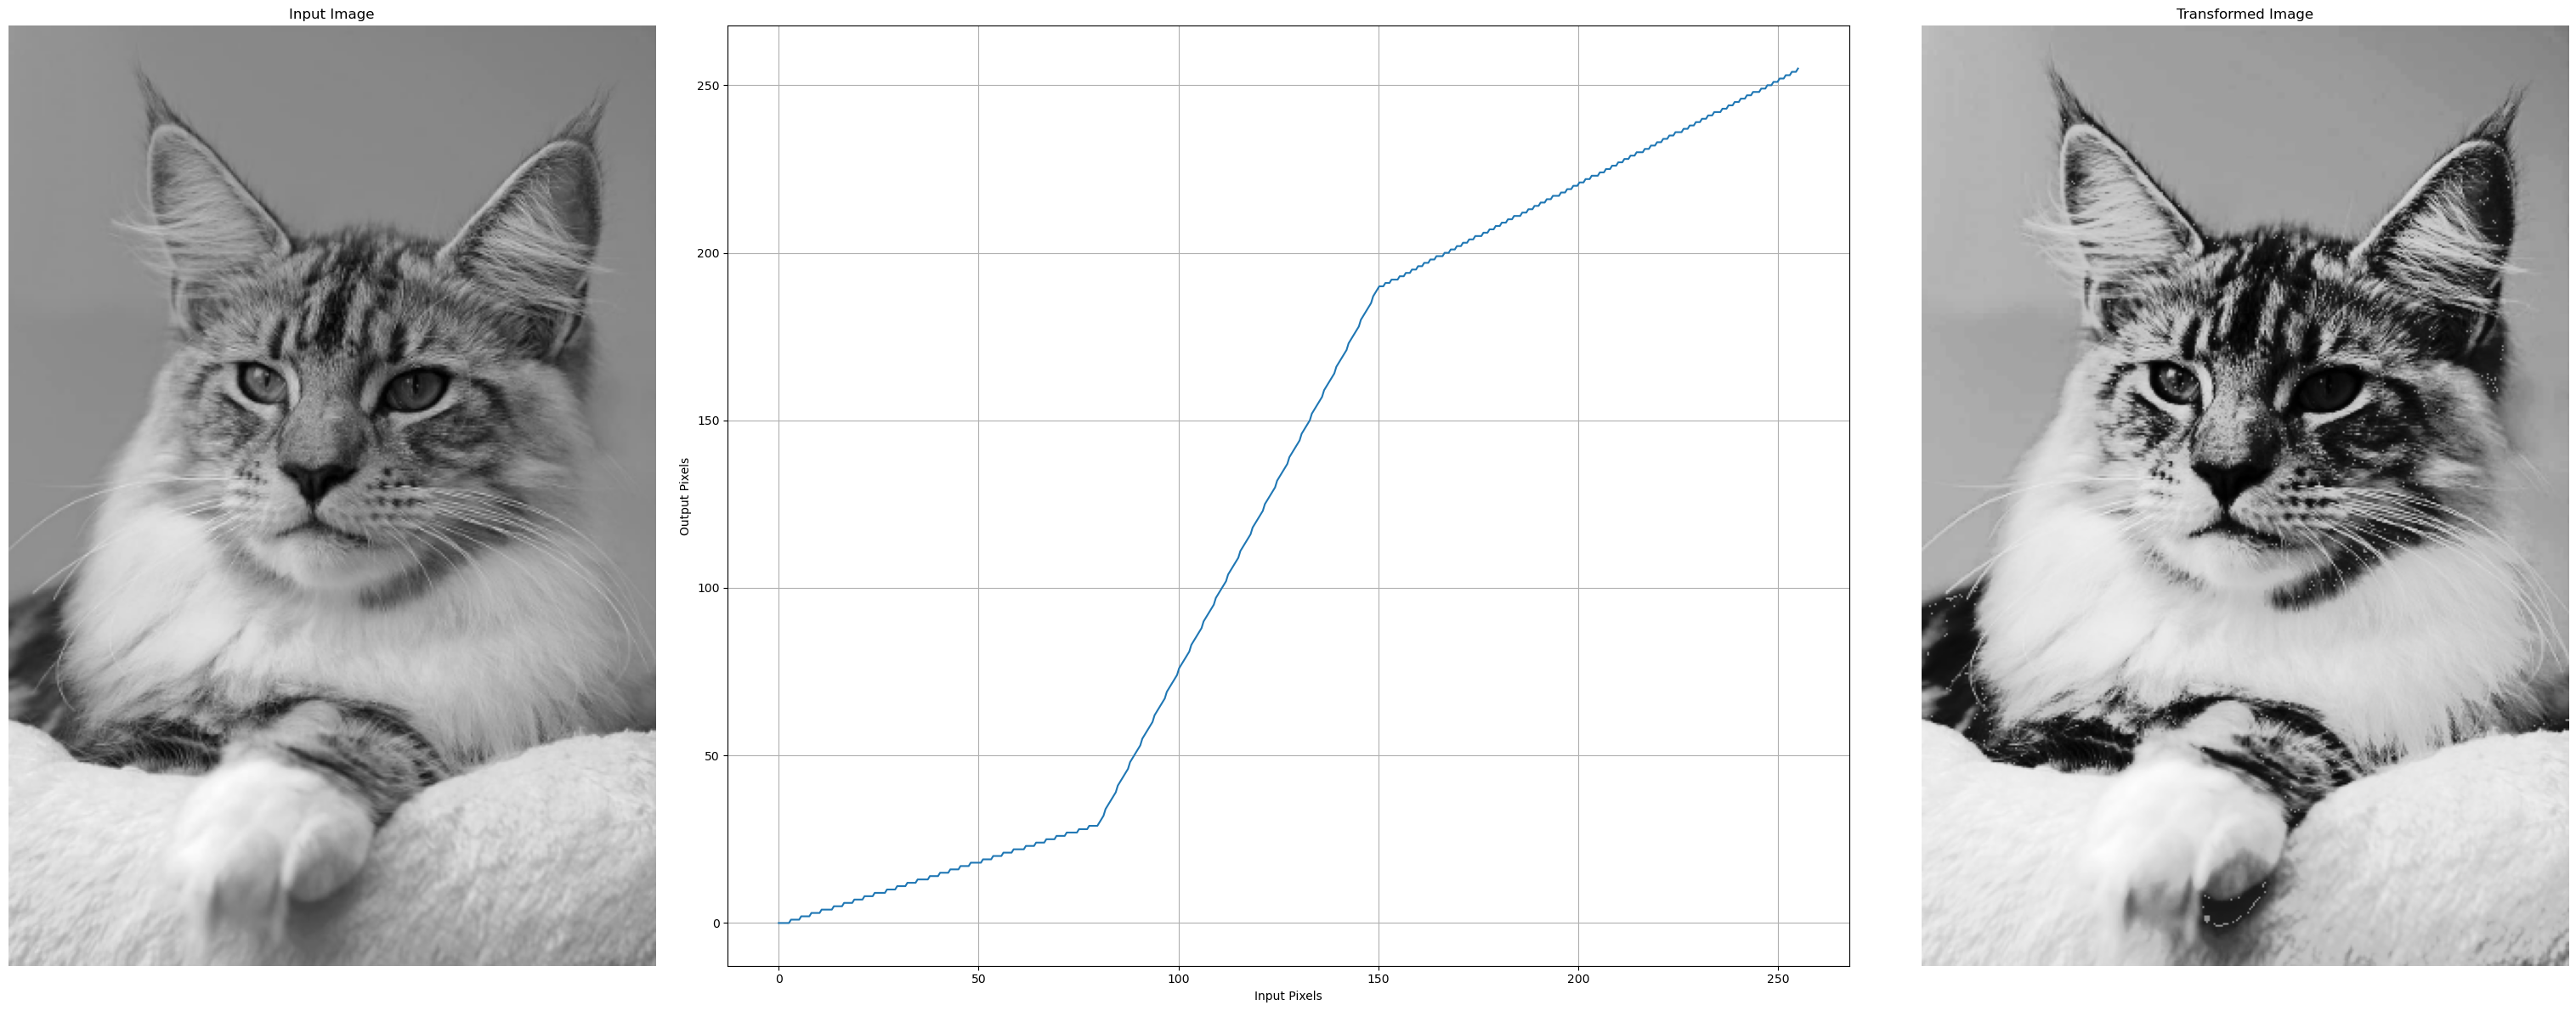

In [9]:
plot_results(img, transformed_img, x_values, y_values, 'img_1')

In [10]:
mean = np.mean(img)

transformed_img2 = contrastStretchingVector (img, mean, 0, mean, 255)

In [11]:
x_values = np.linspace(0,255,500)
y_values = contrastStretchingVector(x_values, mean, 0, mean, 255)

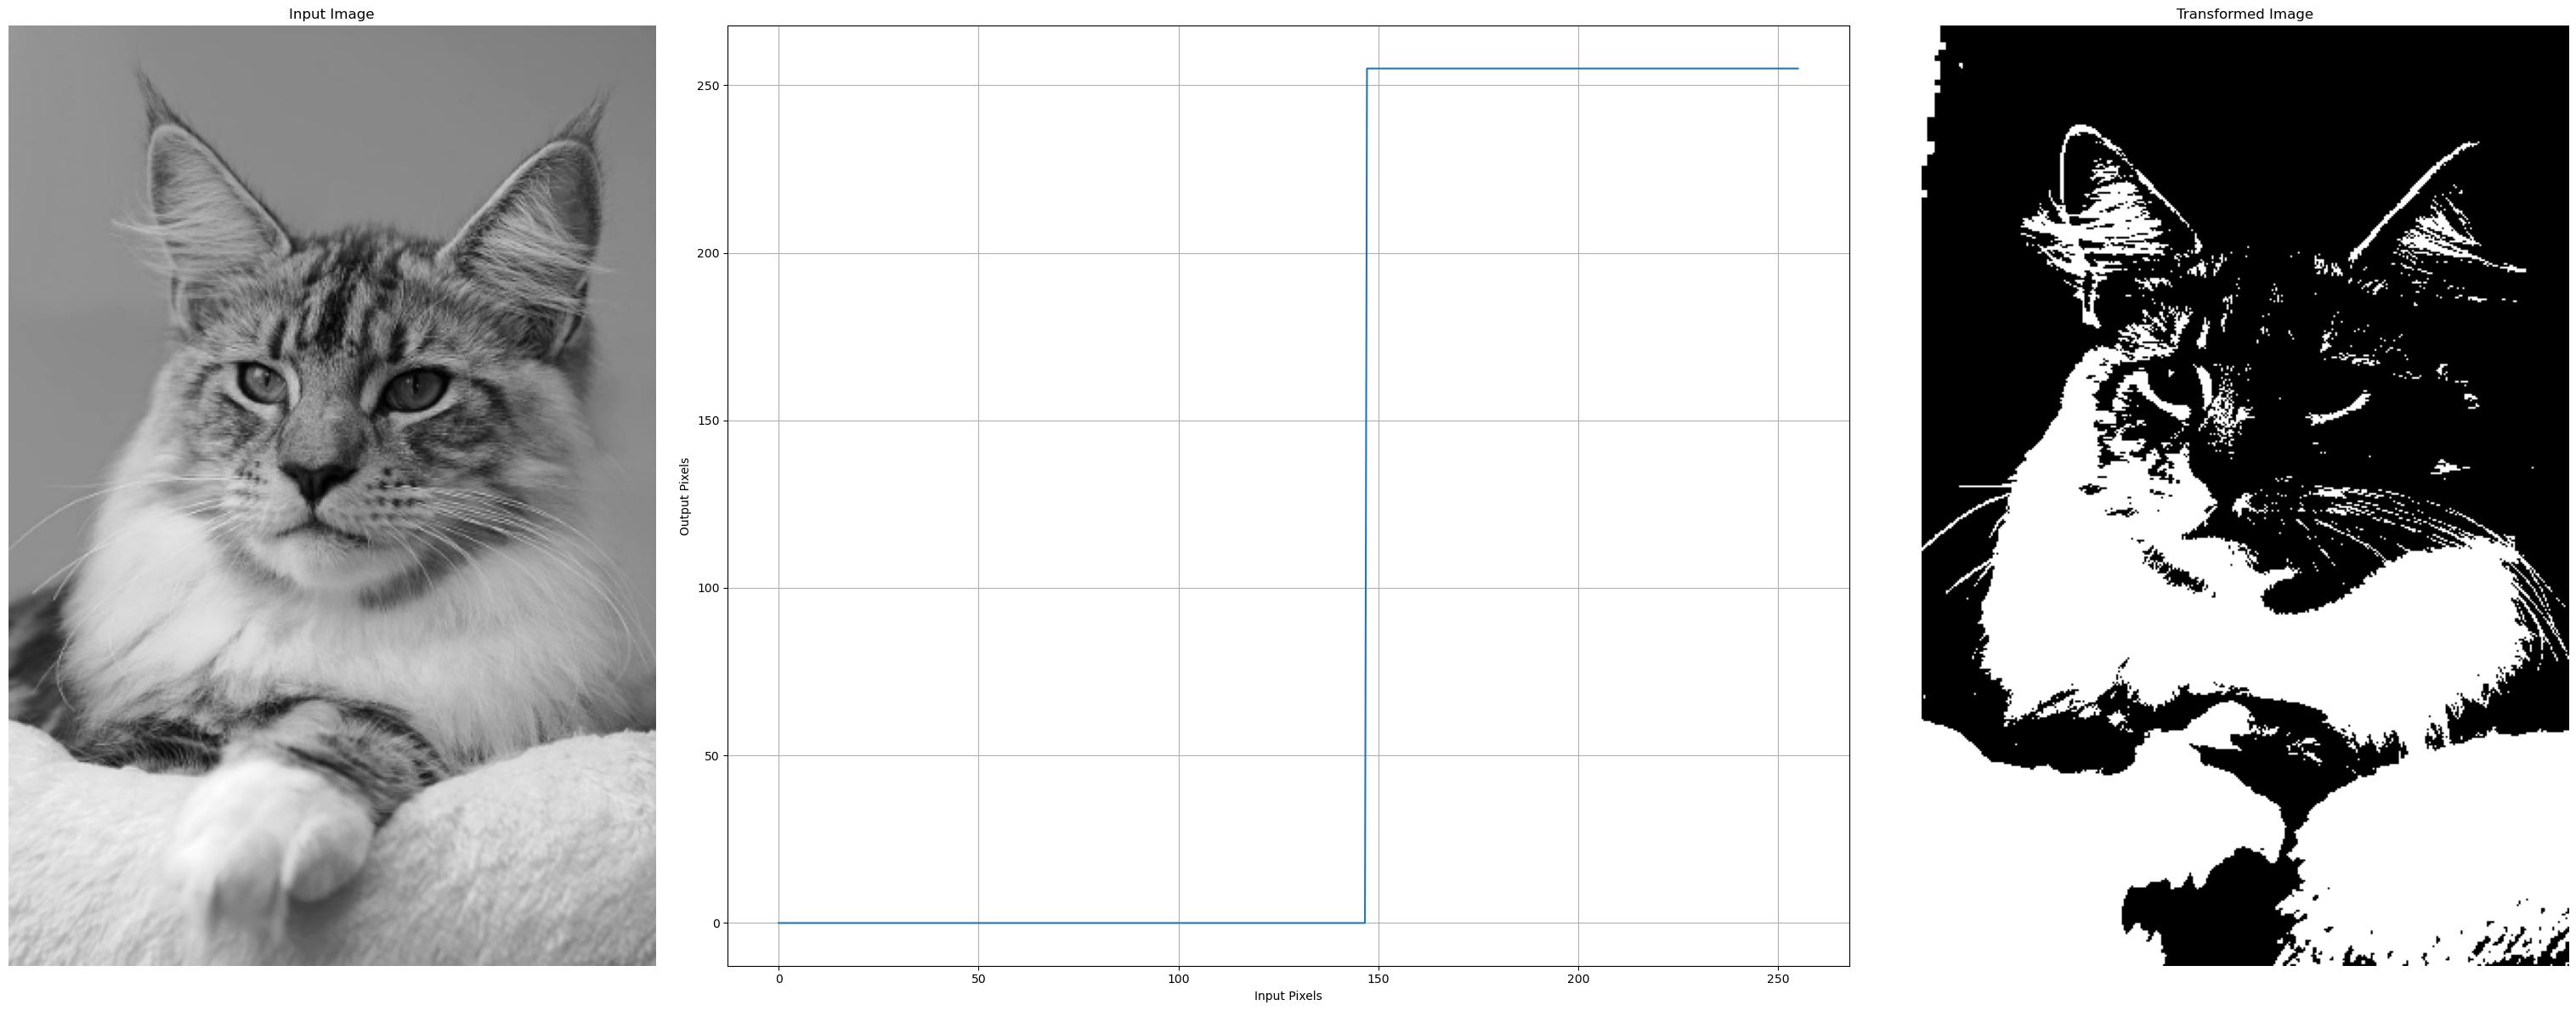

In [12]:
plot_results(img, transformed_img2, x_values, y_values, 'img_2')